In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep = ',')

In [3]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv',sep = ',')

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail() #pixel1, pixel2, ... are the color values of the pixel
# 0 is black and 255 is white

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_test_df.shape

(10000, 785)

In [8]:
training = np.array(fashion_train_df,dtype="float32") # converting data type into float32

In [9]:
testing = np.array(fashion_test_df,dtype="float32") # same goes with testing data

5.0


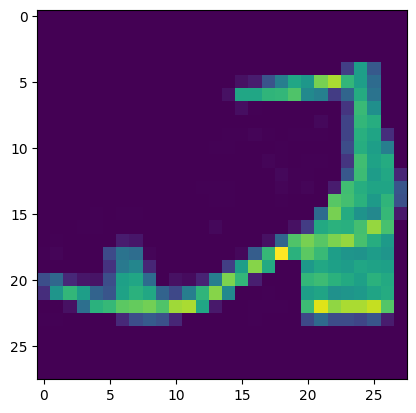

In [10]:
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28)) # this will turn the data into an image
label = training[i,0]
print(label)

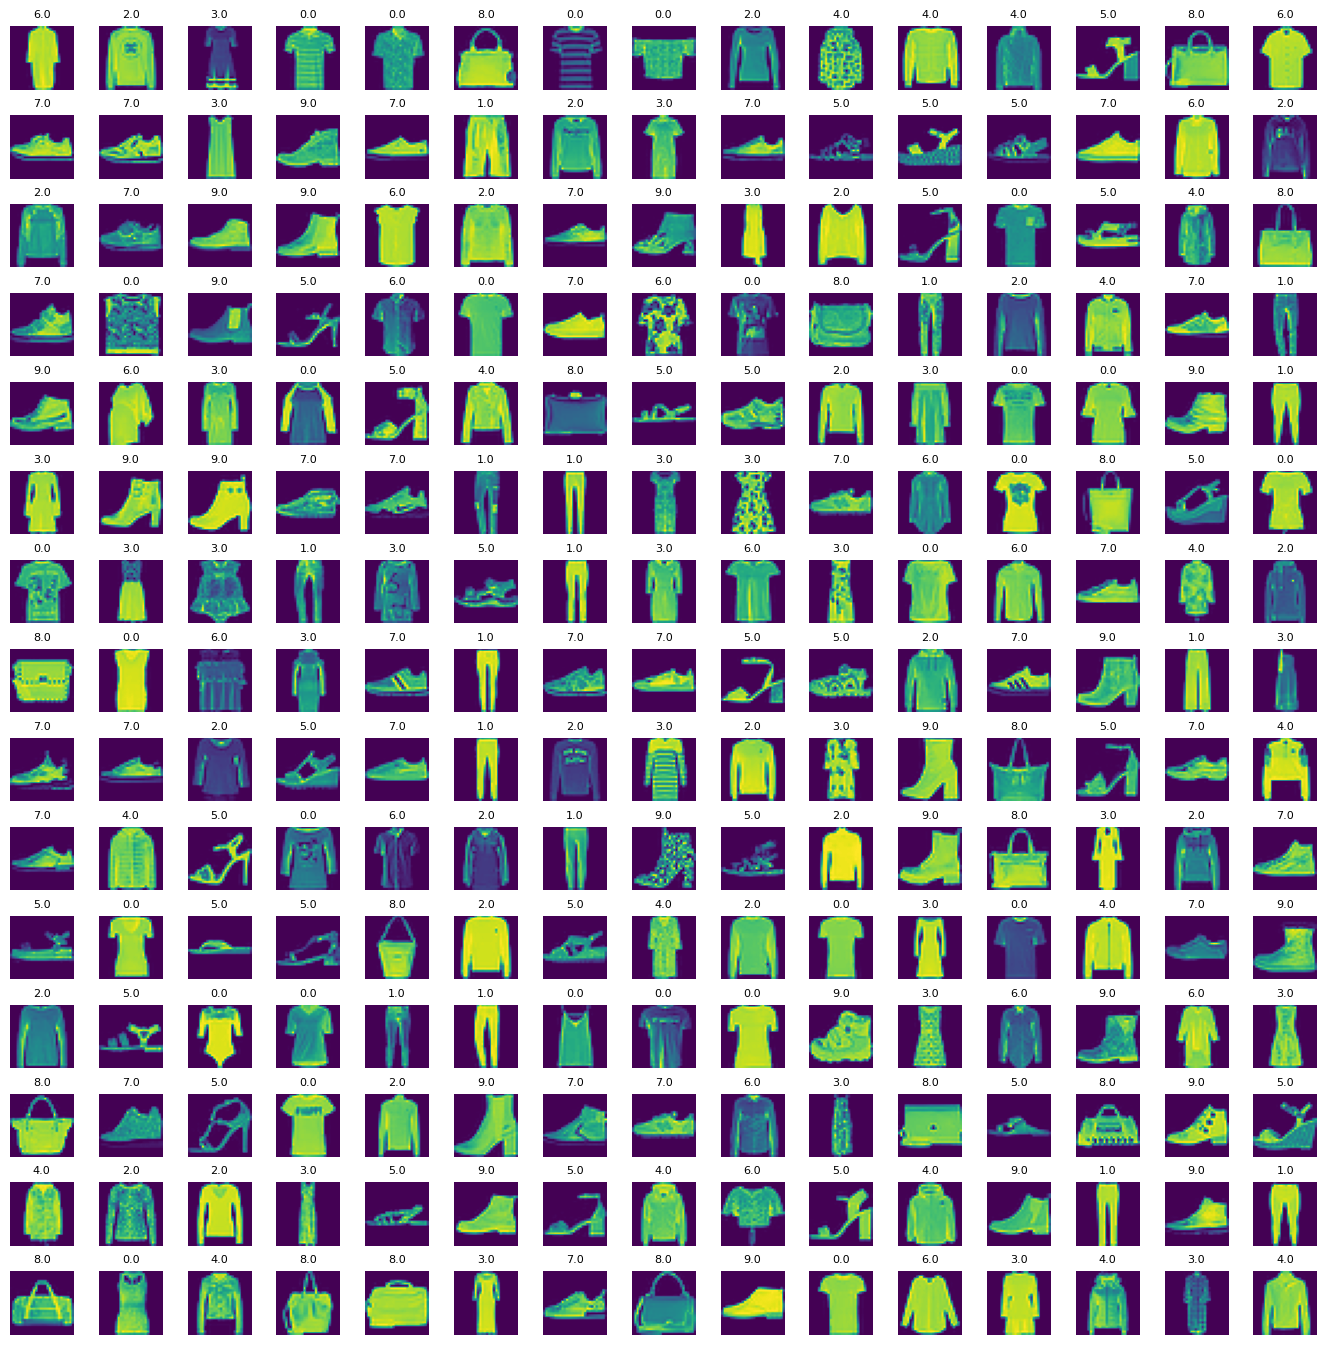

In [11]:
# view more images in a grid format
W_grid = 15
L_grid = 15
fig,axes = plt.subplots(L_grid,W_grid,figsize=(17,17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [12]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
X_train,X_validate,y_train,y_validate=train_test_split(X_train,y_train,test_size = 0.2,random_state = 12345)

In [14]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

In [16]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [17]:
cnn_model.add(Flatten())

In [18]:
cnn_model.add(Dense(units = 32,activation='relu'))
cnn_model.add(Dense(units = 10,activation='sigmoid'))
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
epochs = 50
cnn_model.fit(X_train,y_train,batch_size=512,epochs=50,verbose=1,validation_data = (X_validate,y_validate))

Epoch 1/50


C:\Users\astro\anaconda3\envs\myai\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


94/94 [==============================] - 2s 17ms/step - loss: 1.4344 - accuracy: 0.5358 - val_loss: 0.7866 - val_accuracy: 0.7228
Epoch 2/50
94/94 [==============================] - 2s 17ms/step - loss: 0.6911 - accuracy: 0.7492 - val_loss: 0.6235 - val_accuracy: 0.7713
Epoch 3/50
94/94 [==============================] - 1s 15ms/step - loss: 0.5863 - accuracy: 0.7853 - val_loss: 0.5739 - val_accuracy: 0.7889
Epoch 4/50
94/94 [==============================] - 1s 15ms/step - loss: 0.5402 - accuracy: 0.8020 - val_loss: 0.5259 - val_accuracy: 0.8069
Epoch 5/50
94/94 [==============================] - 2s 18ms/step - loss: 0.5083 - accuracy: 0.8137 - val_loss: 0.5046 - val_accuracy: 0.8167
Epoch 6/50
94/94 [==============================] - 1s 16ms/step - loss: 0.4882 - accuracy: 0.8205 - val_loss: 0.4891 - val_accuracy: 0.8202
Epoch 7/50
94/94 [==============================] - 1s 13ms/step - loss: 0.4731 - accuracy: 0.8265 - val_loss: 0.4755 - val_accuracy: 0.8312
Epoch 8/50
94/94 [======

In [19]:
evaluation = cnn_model.evaluate(X_test,y_test)
predicted_classes = cnn_model.predict(X_test)

313/313 [==============================] - 0s 903us/step


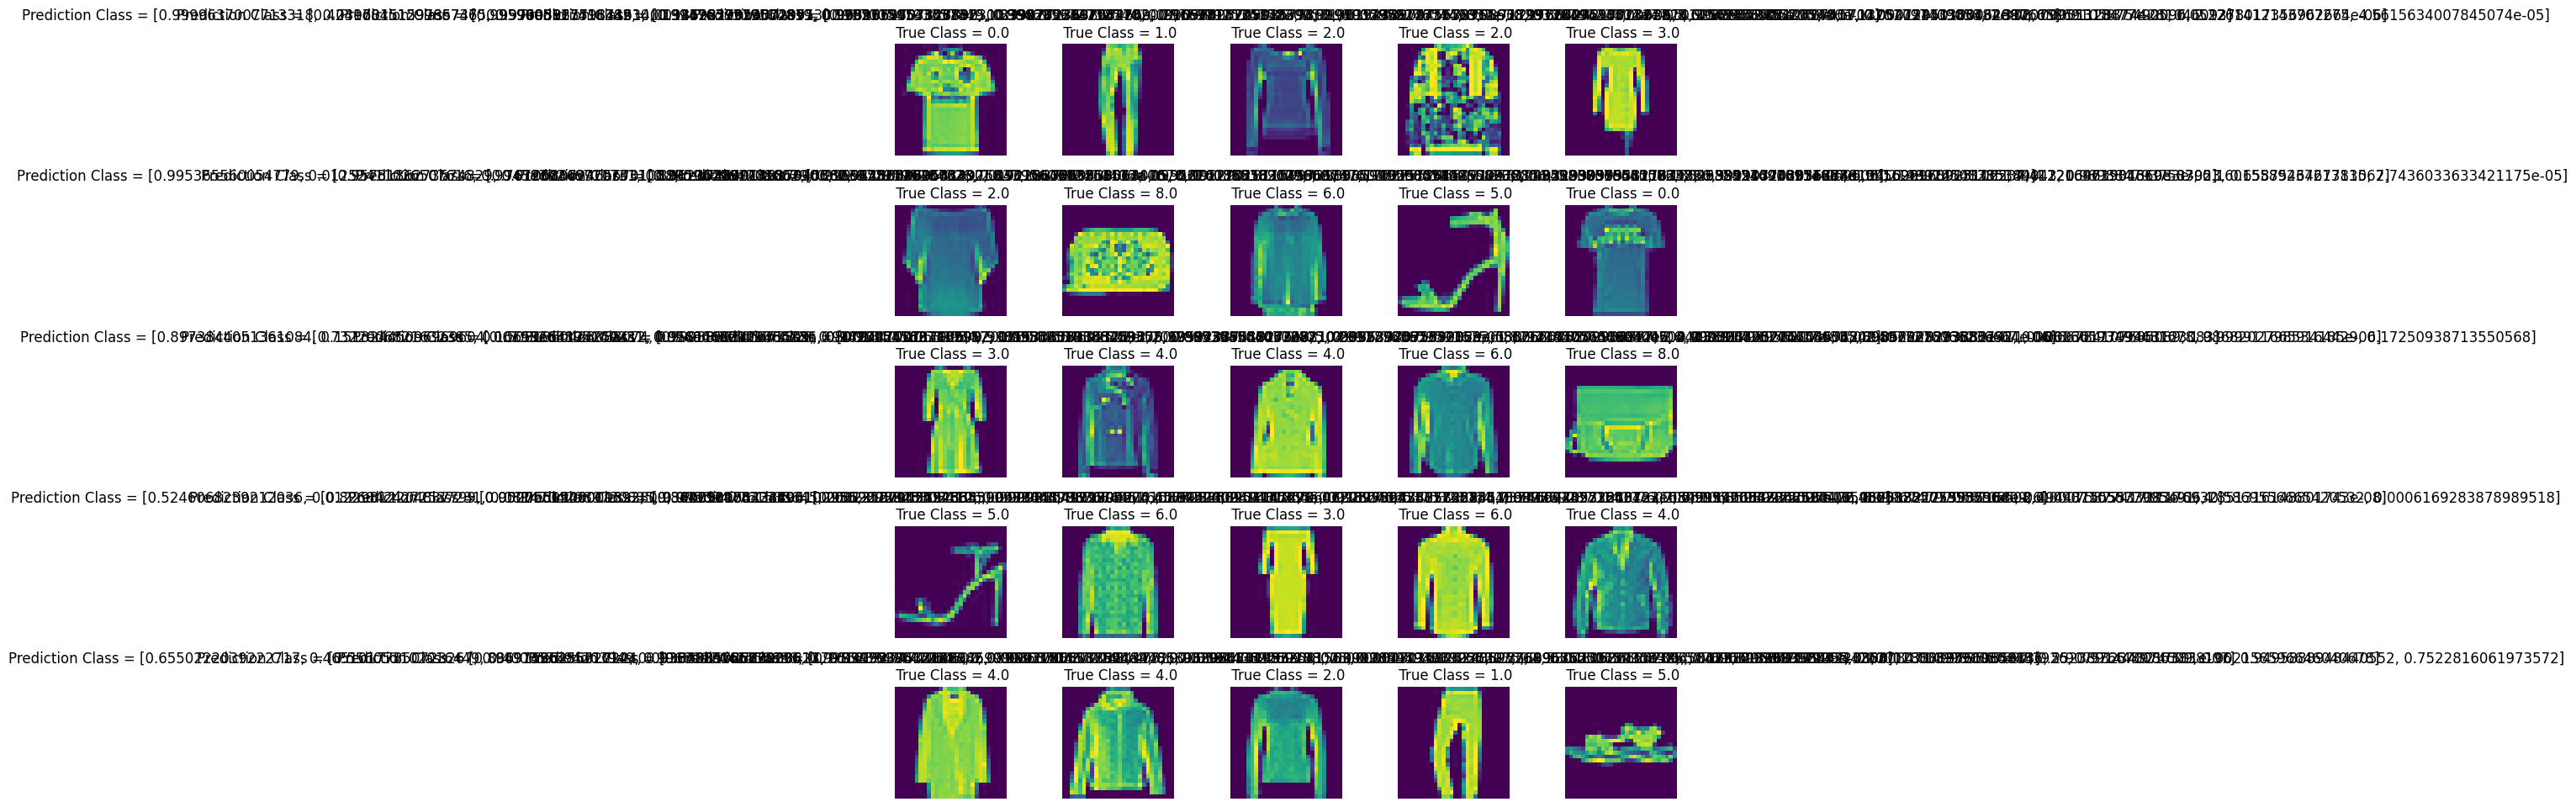

In [20]:
L = 5
W = 5
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in np.arange (0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i].tolist(), y_test[i].item()))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)            